In [23]:
#Dev

import pandas as pd
import numpy as np
# this part needed for mac
# import pymysql
# pymysql.install_as_MySQLdb()
############################
import seaborn as sns
from mysql.connector import MySQLConnection, Error
from XML2MySQL import connect
from MySQL2PandasDF import MySQL2PandasDF
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
% matplotlib inline

# Init Session Object

In [2]:
session = MySQL2PandasDF(host = 'localhost', db = 'stackexchange_travel', user = 'root', password = password)

Connection to MySQL database stackexchange_travel successful.


## db2df method parses the entirety of a database to pandas dfs

In [3]:
session.db2df()

C:\Users\jeffe\Anaconda3\lib\site-packages\sqlalchemy\dialects\mysql\base.py:1546: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


Underlying structure is a dictionary with the following format:

{Table Name: df}

In [4]:
# tables in our dictionary

session.source.keys()

dict_keys(['badges', 'comments', 'posthistory', 'postlinks', 'posts', 'tags', 'users', 'votes'])

## Head of every table in database

In [5]:
session.source['badges'].head()

,index,class,Date,id,Name,TagBased,userId
0,0,3,2011-06-21 20:16:49,1,Autobiographer,False,2
1,1,3,2011-06-21 20:16:49,2,Autobiographer,False,3
2,2,3,2011-06-21 20:16:49,3,Autobiographer,False,4
3,3,3,2011-06-21 20:21:49,4,Autobiographer,False,6
4,4,3,2011-06-21 20:21:49,5,Autobiographer,False,8


In [6]:
session.source['comments'].head()

,index,CreationDate,Id,PostId,score,Text,UserDisplayName,userId
0,0,2011-06-21 20:25:14,1,1,0,To help with the cruise line question: Where a...,None,12.0
1,1,2011-06-21 20:27:35,2,1,0,"Toronto, Ontario. We can fly out of anywhere t...",None,9.0
2,2,2011-06-21 20:32:24,3,1,3,"""Best"" for what? Please read [this page](http...",None,20.0
3,3,2011-06-21 20:42:08,9,25,0,"Are you in the UK? If so, would be helpful to ...",None,30.0
4,4,2011-06-21 20:44:10,12,26,3,"Where are you starting from, and what sort of ...",None,26.0


In [7]:
session.source['posthistory'].head()

,index,Comment,CreationDate,Id,PostHistoryTypeId,PostID,RevisionGUID,Text,UserDisplayName,UserId
0,0,None,2011-06-21 20:19:35,1,2,1,1e04af17-3bdb-4263-aa46-97ee7fb1b0b6,My finance and myself are looking for a good C...,None,9.0
1,1,None,2011-06-21 20:19:35,2,1,1,1e04af17-3bdb-4263-aa46-97ee7fb1b0b6,What's the best Caribbean cruise for October,None,9.0
2,2,None,2011-06-21 20:19:35,3,3,1,1e04af17-3bdb-4263-aa46-97ee7fb1b0b6,<caribbean><cruising><vacations>,None,9.0
3,3,None,2011-06-21 20:22:34,4,2,2,58500a29-b9ed-4802-9934-c173ce362758,"This was one of our definition questions, but ...",None,13.0
4,4,None,2011-06-21 20:22:34,5,1,2,58500a29-b9ed-4802-9934-c173ce362758,How can I find a guide that will take me safel...,None,13.0


In [8]:
session.source['postlinks'].head()

,index,CreationDate,Id,LinkTypeId,PostId,RelatedPostId
0,0,2011-06-21 20:49:20,168,1,28,25
1,1,2011-06-21 22:55:01,1304,1,110,10
2,2,2011-06-22 11:58:40,2930,1,203,185
3,3,2011-06-22 12:32:01,2981,1,189,105
4,4,2011-06-22 20:56:21,3507,1,226,185


In [9]:
session.source['posts'].head()

,index,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
0,0,393,4,<p>My fiancée and I are looking for a good Car...,2013-02-25T23:52:47.953,4,NaT,2011-06-21T20:19:34.730,NaN,1,...,None,101.0,None,9.0,NaN,1,8,<caribbean><cruising><vacations>,What are some Caribbean cruises for October?,419.0
1,1,None,7,"<p>This was one of our definition questions, b...",None,4,NaT,2011-06-21T20:22:33.760,5.0,2,...,None,13.0,None,13.0,NaN,1,32,<guides><extreme-tourism><amazon-river><amazon...,How can I find a guide that will take me safel...,1399.0
2,2,None,None,<p>One way would be to go through an Adventure...,None,2,NaT,2011-06-21T20:24:28.080,NaN,3,...,None,NaN,None,9.0,2.0,2,12,None,None,NaN
3,3,None,1,<p>Singapore Airlines has an all-business clas...,None,1,NaT,2011-06-21T20:24:57.160,NaN,4,...,None,693.0,None,24.0,NaN,1,8,<loyalty-programs><routes><ewr><singapore-airl...,Does Singapore Airlines offer any reward seats...,243.0
4,4,770,5,<p>Another definition question that interested...,None,0,NaT,2011-06-21T20:25:56.787,2.0,5,...,None,101.0,None,13.0,NaN,1,14,<romania><transportation>,What is the easiest transportation to use thro...,395.0


In [10]:
session.source['tags'].head()

,index,Count,ExcerptPostId,Id,TagName,WikiPostId
0,0,104,2138.0,1,cruising,2137.0
1,1,43,357.0,2,caribbean,356.0
2,2,43,319.0,4,vacations,318.0
3,3,8,14548.0,6,amazon-river,14547.0
4,4,100,1792.0,8,romania,1791.0


In [11]:
session.source['users'].head()

,index,AboutMe,accountid,age,CreationDate,DisplayName,downvotes,Id,LastAccessDate,Location,ProfileImageUrl,reputation,upvotes,Views,WebsiteUrl
0,0,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",-1.0,NaN,2011-06-21T15:16:44.253,Community,12646,-1,2011-06-21T15:16:44.253,on the server farm,None,1,2472,0,http://meta.stackexchange.com/
1,1,<p>Developer on the Stack Overflow team. Find...,2.0,40.0,2011-06-21T20:10:03.720,Geoff Dalgas,0,2,2016-05-29T01:18:20.767,"Corvallis, OR",None,101,1,31,http://stackoverflow.com
2,2,"<p>I am the <a href=""http://stackoverflow.com/...",7598.0,32.0,2011-06-21T20:11:02.490,Nick Craver,0,3,2015-09-14T12:03:40.247,"Winston-Salem, NC",https://i.stack.imgur.com/nGCYr.jpg?s=128&g=1,101,1,14,https://nickcraver.com/blog/
3,3,"<p>co-founder of <a href=""https://airtable.com...",1998.0,31.0,2011-06-21T20:12:21.223,Emmett,0,4,2013-03-01T22:30:26.790,"San Francisco, CA",https://i.stack.imgur.com/d1oHX.jpg?s=128&g=1,101,1,10,http://minesweeperonline.com
4,4,"<p><a href=""http://blog.stackoverflow.com/2010...",29738.0,NaN,2011-06-21T20:15:31.410,Kevin Montrose,0,5,2017-02-07T02:24:34.733,"New York, NY, United States",None,101,1,11,http://kevinmontrose.com/


In [12]:
session.source['votes'].head()

,index,BountyAmount,CreationDate,Id,PostId,UserId,VoteTypeId
0,0,NaN,2011-06-21,1,1,NaN,2
1,1,NaN,2011-06-21,2,1,NaN,2
2,2,NaN,2011-06-21,3,2,NaN,2
3,3,NaN,2011-06-21,4,3,NaN,2
4,4,NaN,2011-06-21,5,5,13.0,5


# Data Exploration

### Now we can begin asking questions about our data

Using either MySQL syntax or the built in functionality/flexability of pandas DataFrames

For example, lets plot the post history by tag

In [13]:
q1 = 'Most Viewed posts by Tag category'

query1 = '   SELECT t.TagName, t.Count \
             FROM stackexchange_travel.tags t \
             ORDER BY t.Count DESC \
             LIMIT 25'

session.query_mysql(query1,q1)

,TagName,Count
0,visas,5271
1,usa,2858
2,air-travel,2830
3,uk,2114
4,schengen,2094
5,customs-and-immigration,1798
6,transit,1204
7,trains,1031
8,passports,954
9,indian-citizens,916


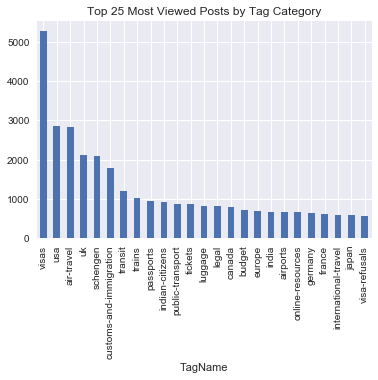

In [177]:
piccap1 = 'Top 25 Most Viewed Posts by Tag Category'
session.plotdf(session.history[q1].plot.bar(x='TagName',y='Count',legend=None),piccap1)
plt.title(piccap1)

# Find posts tagged to multiple items and plot post activity

In [15]:
def plot_post_activity_for_posts_with_multiple_tags(tags_search_term1, tags_search_term2):
    """
    This function returns a histogram of post activity for posts tagged with any two tags
    
    params:     tags_search_term1: str: first tag search term to find posts with
                tags_search_term2: str: second tag search term to find posts with
                
    return:     matplotlib.pyplot.hist of number of post reponses for given topic
    """
    if isinstance(tags_search_term1,str) and isinstance(tags_search_term2,str):
        # Extract html from body of posts
        session.source['posts']['Body_extract1'] = session.source['posts']["Body"].str.findall(r">(:?.+)<").str.join(' ')
        session.source['posts']['Body_links'] = session.source['posts']["Body_extract1"].str.findall(r">(:?.+)<").str.join('').str.findall(r'"(:?.+)"').str.join(' ')
        session.source['posts']['Tags_tags_removed'] = session.source['posts']['Tags'].str.findall(r"<(:?.+)>").str.join('').str.replace('>','').str.replace('<',' ')
        
        # Create search space to find search terms within
        # Groupby and stage data
        session.source['posts_'+tags_search_term1+'_tags'] = session.source['posts'][session.source['posts']['Tags_tags_removed'].str.contains(tags_search_term1,na=False)]
        session.source['posts_'+tags_search_term1+'_tags']['Search_Space'] = session.source['posts_'+tags_search_term1+'_tags']['Tags_tags_removed'].map(str) + ' ' + session.source['posts_'+tags_search_term1+'_tags']['Title']
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2] = session.source['posts_'+tags_search_term1+'_tags'][session.source['posts_'+tags_search_term1+'_tags']['Search_Space'].str.lower().str.contains(tags_search_term2,na=False)]
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links'] = session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2].sort_values('ViewCount', ascending=False)[['Id','Title', 'Body_extract1', 'Body_links']]
        session.source['comments_id_score_text'] = session.source['comments'][['PostId','score','Text']]
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_comments_id_score_text'] = pd.merge(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links'], session.source['comments_id_score_text'],left_on='Id', right_on='PostId')
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_comments_id_score_text_qs_sorted_by_number_of_comments'] = session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_comments_id_score_text'].groupby('Title').count().sort_values('Text', ascending=False)
        
        # Plot
        piccap = 'Frequency Distribution of Comments on Posts Tagged '+tags_search_term1+' and '+tags_search_term2
        session.plotdf(sns.distplot(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_comments_id_score_text_qs_sorted_by_number_of_comments']['Text']),piccap)
        plt.title('Histogram of Responses to Posts Tagged '+tags_search_term1+' and '+ tags_search_term2)
        plt.xlabel('Number of Responses')
        plt.ylabel('Frequency')
    else:
        input('Inputs must be strings. Press any key to exit program.')
        sys.exit()

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


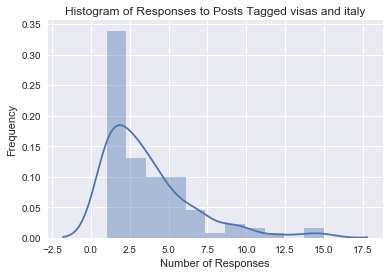

In [16]:
plot_post_activity_for_posts_with_multiple_tags('visas','italy')

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


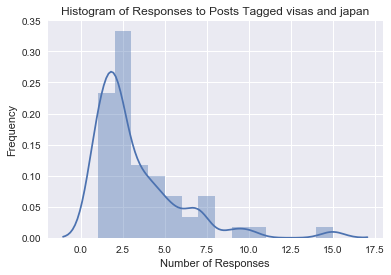

In [17]:
plot_post_activity_for_posts_with_multiple_tags('visas','japan')

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


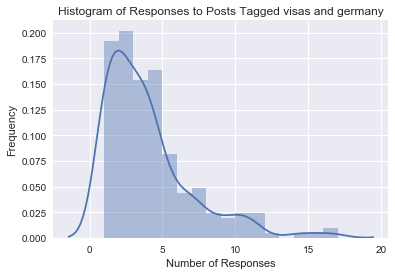

In [18]:
plot_post_activity_for_posts_with_multiple_tags('visas','germany')

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


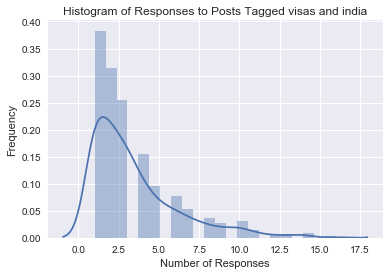

In [20]:
plot_post_activity_for_posts_with_multiple_tags('visas','india')

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


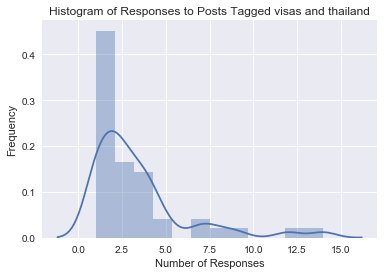

In [21]:
plot_post_activity_for_posts_with_multiple_tags('visas','thailand')

## Comparison of post activities

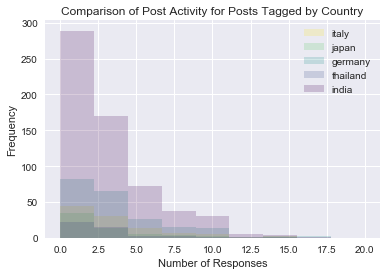

In [34]:
bins = np.linspace(0, 20, 10)
number = 5
cmap = plt.get_cmap('viridis_r')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
for search_term2, color in zip(['italy','japan','germany','thailand', 'india'], colors):
    plt.hist(session.source['posts_visas_tagged_'+search_term2+'_Title_Body_Links_comments_id_score_text_qs_sorted_by_number_of_comments']['Text'], bins, alpha=0.2, label=search_term2, color=color)
plt.xlabel('Number of Responses')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Comparison of Post Activity for Posts Tagged by Country')

Posts tagged 'visas' and 'india' have the most post activity out of the 5 countries explored

## Posts tagged 'visas' and 'india'

In [82]:
session.source['posts_'+'visas'+'_tagged_'+'india'+'_Title_Body_Links'].head()

,Id,Title,Body_extract1,Body_links
28020,38859,"When applying for an Indian Passport, how do I...",I'm applying for a fresh Passport from India b...,
25829,36115,How to track my UK Visa Application Status?,Is there any way I can track the status of my ...,
9260,9926,London Heathrow airport - do I need a transit ...,I am traveling from the US to India via London...,
12696,14834,UK Transit Visa from USA to India,I'm traveling to India from the US for my H1 s...,
30162,42529,How much money do I need to show as proof of s...,I am an Indian citizen studying in Italy on an...,


## Sort data by various features

In [135]:
def top_n_posts_with_multiple_tags(tags_search_term1, tags_search_term2, n=25, sort_method='views'):
    """
    This function returns a histogram of post activity for posts tagged with any two tags
    
    params:     tags_search_term1: str: first tag search term to find posts with
                tags_search_term2: str: second tag search term to find posts with
                n: int: n top number of posts to sort by
                sort_method: str: can either be ['views', 'scores']
                
    return:
    """
    if isinstance(tags_search_term1,str) and isinstance(tags_search_term2,str) and isinstance(n,int) and (sort_method =='views' or sort_method=='scores'):
        print('Top {}  Posts Tagged "{}" and "{}" Sorted by {}'.format(str(n), tags_search_term1, tags_search_term2, sort_method))
        print()
        # Extract html from body of posts
        session.source['posts']['Body_extract1'] = session.source['posts']["Body"].str.findall(r">(:?.+)<").str.join(' ')
        session.source['posts']['Body_links'] = session.source['posts']["Body_extract1"].str.findall(r">(:?.+)<").str.join('').str.findall(r'"(:?.+)"').str.join(' ')
        session.source['posts']['Tags_tags_removed'] = session.source['posts']['Tags'].str.findall(r"<(:?.+)>").str.join('').str.replace('>','').str.replace('<',' ')
        
        # Create search space to find search terms within
        # Groupby and stage data
        session.source['posts_'+tags_search_term1+'_tags'] = session.source['posts'][session.source['posts']['Tags_tags_removed'].str.contains(tags_search_term1,na=False)]
        session.source['posts_'+tags_search_term1+'_tags']['Search_Space'] = session.source['posts_'+tags_search_term1+'_tags']['Tags_tags_removed'].map(str) + ' ' + session.source['posts_'+tags_search_term1+'_tags']['Title']
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2] = session.source['posts_'+tags_search_term1+'_tags'][session.source['posts_'+tags_search_term1+'_tags']['Search_Space'].str.lower().str.contains(tags_search_term2,na=False)]
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links'] = session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2].sort_values('ViewCount', ascending=False)[['Id','Title', 'Body_extract1', 'Body_links']]
        session.source['comments_id_score_text'] = session.source['comments'][['PostId','score','Text','UserDisplayName']]
        session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'] = pd.merge(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links'], session.source['posts'][['Id','Score','ViewCount','ClosedDate']],left_on='Id', right_on='Id')
        if sort_method=='views':
            for i, t, be, bl in zip(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('ViewCount', ascending=False).head(n)['Id'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('ViewCount', ascending=False).head(n)['Title'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('ViewCount', ascending=False).head(n)['Body_extract1'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('ViewCount', ascending=False).head(n)['Body_links'], ):
                print('Title:\n'+ t)
                print()
                print()
                print('Post Body:\n'+be)
                print()
                print()
                print('Post Link:\n'+bl)
                print()
                print()
                print('Comments:\n')
                for i,comment in enumerate(session.source['comments_id_score_text'].loc[session.source['comments_id_score_text']['PostId']==i]['Text']):
                    print()
                    print()
                    print('Comment '+str(i+1)+':\n'+comment)
                    print()
                    print()
        else:
            for i, t, be, bl in zip(session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('Score', ascending=False).head(n)['Id'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('Score', ascending=False).head(n)['Title'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('Score', ascending=False).head(n)['Body_extract1'], \
                                    session.source['posts_'+tags_search_term1+'_tagged_'+tags_search_term2+'_Title_Body_Links_Score_Views_ClosedDate'].sort_values('Score', ascending=False).head(n)['Body_links'], ):
                print('Title:\n'+ t)
                print()
                print()
                print('Post Body:\n'+be)
                print()
                print()
                print('Post Link:\n'+bl)
                print()
                print()
                print('Comments:\n')
                for i,comment in enumerate(session.source['comments_id_score_text'].loc[session.source['comments_id_score_text']['PostId']==i]['Text']):
                    print()
                    print()
                    print('Comment '+str(i+1)+':\n'+comment)
                    print()
                    print()

## Top 25 Posts by Score Tagged 'visas' and 'india'

In [136]:
top_n_posts_with_multiple_tags('visas', 'india',sort_method='scores')

Top 25  Posts Tagged "visas" and "india" Sorted by scores

Title:
Too many countries to apply for Indian E-Visa?


Post Body:
So I'm applying for an E-Visa for India.  At one point in the form it asks for the countries you've visited in the past 10 years.  I started listing them, got up to the 'C's, and received this error: <a href="https://i.stack.imgur.com/2VQyA.png" rel="nofollow noreferrer"><img src="https://i.stack.imgur.com/2VQyA.png" alt="Countries Visited in Last 10 years: Max length of Visited Country is reached"></a> Now what? Do I just say "too many for your form" or just list a few recent ones? Or just the ones I spent the most time in?


Post Link:
https://i.stack.imgur.com/2VQyA.png" alt="Countries Visited in Last 10 years: Max length of Visited Country is reached


Comments:



Comment 1:
#MarkMayo Problems




Comment 2:
@mts sadly not on that page. If it was a paper application I'd just attach a separate page.




Comment 3:
Just add a hyperlink to your visited countri

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Top 25 Posts Tagged 'visas' and 'india' by ViewCount

In [124]:
top_n_posts_with_multiple_tags('visas', 'india')

Top 25  Posts Tagged "visas" and "india" Sorted by views

Title:
When applying for an Indian Passport, how do I know if I'm in the ECR or non-ECR category?


Post Body:
I'm applying for a fresh Passport from India but I don't know what "ECR" &amp; "NON-ECR" mean: "Is applicant eligible for Non-ECR category?" [Yes] [No] I've already Graduated from University. I don't know whether to choose "YES" or "NO"?. I'm Indian by birth.


Post Link:



Comments:



Comment 1:
Here you have stated that children up to 18 years of age. AS it means as they are under 18 years or minor they are eligibel for non ecr category.


Title:
How to track my UK Visa Application Status?


Post Body:
Is there any way I can track the status of my application? I have applied for a visa on 20th Aug and I have opted for SMS notifications. First day I got an SMS from VFS Team stating application forwarded to Embassy. Today is the 10th working day and I have not received any further updated SMS from VFS Team about the a

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Word map of Top 25 Posts

In [240]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from wordcloud import WordCloud
from collections import Counter
from itertools import chain

stop = stopwords.words('english')

def remove_stop_words(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return ' '.join([word for word in nopunc.split() if word.lower() not in stop])

def lemma(text):
    '''
    Takes in a string of text, then performs the following:
    '''
    lemma = WordNetLemmatizer()
    normalized = " ".join(lemma.lemmatize(word,'v') for word in text.split())
    x = normalized.split()
    y = [s for s in x if len(s) > 2]
    return y

def word_map_from_df(df, number_of_words=25):
    df['Search_space'] = df['Body_extract1'] + df['Title']
    df['Search_space_stopwords_removed'] = df['Search_space'].apply(lambda x: remove_stop_words(x))
    df['Search_space_stopwords_removed_lemma'] = df['Search_space_stopwords_removed'].apply(lambda x: lemma(x))
    wc = WordCloud(max_font_size=60, max_words=number_of_words).generate(' '.join(list(chain.from_iterable([x for x in df['Search_space_stopwords_removed_lemma']]))))
    plt.figure(figsize=(12,18))
    plt.imshow(wc)
    plt.axis("off")

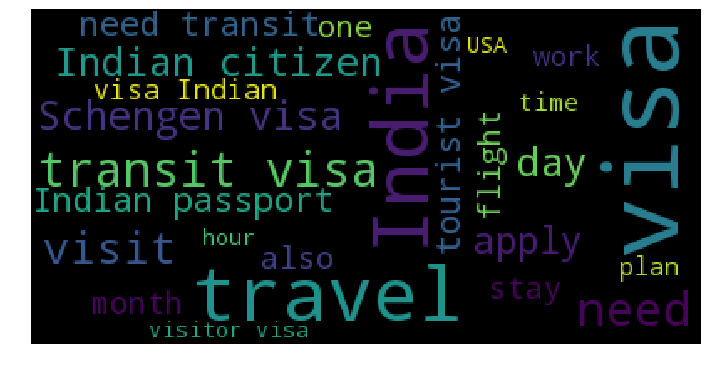

In [241]:
word_map_from_pd_series(session.source['posts_'+'visas'+'_tagged_'+'india'+'_Title_Body_Links_Score_Views_ClosedDate'])